# 4.10 - Part 1

## Importing Libraries and Dataframe

In [16]:
#importing libraries and new customer data set
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
instacartdata = pd.read_pickle(r'/Users/jonahsnewmacbook/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_fin.pkl')

In [18]:
#create a path
path=r'/Users/jonahsnewmacbook/Instacart Basket Analysis'

In [19]:
#checking for the columns in the dataframe
instacartdata.dtypes

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_timestamp              int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
exists                    category
price_range_loc             object
busiest_day                 object
busiests_days               object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spender_habit              float64
spender_habit2              object
frequency_median           float64
frequency_buyer             object
first_name                  object
surname                     object
gender              

### Addressing the PII with the dataframe.
#### This dataframe has information that can be traced back to particular individual such as name, age, income, and such. With that being said these dataframe is to stay confidential within the company and, if needed, those PII can be deleted.

## Comparing customer behavior in different Regional Divisions within United States
#### (Regional Division is based off of United States Census Bureau: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [20]:
# Creating a 'region' column to be able to group the states
# 1. Creating 'Northeast'
instacartdata.loc[instacartdata['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [21]:
# 2. Creating 'Midwest'
instacartdata.loc[instacartdata['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [22]:
# 3. Creating 'South'
instacartdata.loc[instacartdata['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [23]:
# 4. Creating 'West'
instacartdata.loc[instacartdata['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [24]:
#Checking for the frequency per each category in the 'region' column
instacartdata['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [25]:
# Now that 'region' column has been created, check for spending habits per each region

In [26]:
pd.options.display.max_columns = None

In [27]:
instacartdata.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_timestamp,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_spent,spender_habit,spender_habit2,frequency_median,frequency_buyer,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,both,Mid-range product,Regularly busy,Regularly days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,0.0,4,0,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,both,Low-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,both,both,Low-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
7,6184,Clementines,32,4,4.3,1977647,138,30,6,17,20.0,3,0,both,both,Low-range product,Regularly busy,Regularly days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
8,6901,Raisin Bran,121,14,2.9,1154289,138,18,1,7,3.0,2,0,both,both,Low-range product,Regularly busy,Busiest days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,9.0,3,0,both,both,Mid-range product,Busiest day,Busiest days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [28]:
# using a groupby function to get the mean per region (mean is derived from 'spender_habit')
instacartdata.groupby('region').agg({'spender_habit': ['mean']})

,spender_habit
,mean
region,
Midwest,12.715483
Northeast,11.554997
South,12.195577
West,11.319834


In [29]:
# Creating a bar graph to show the spending habit per each region
region_spending = instacartdata.groupby('region').agg({'spender_habit': ['mean']})

Text(0.5, 0, 'Region')

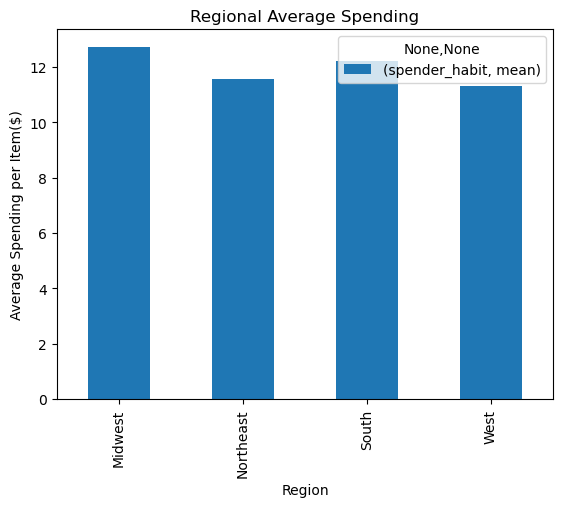

In [30]:
region_spending = region_spending.plot.bar(ylabel = 'Average Spending per Item ($)')
plt.title ('Regional Average Spending')
plt.ylabel ('Average Spending per Item($)')
plt.xlabel ('Region')

In [31]:
#Saving the figure
region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10 Visual', 'region_spending.png'))

#### Looking at the spending habit of each region, they do not differ much. It could be due to having an outlier per region. For example, densely populated states like California, New York, and Texas can skew data. To further analyze this data, 'division' spending analyzation can be done. It still follows the regional divisions used by the United States Census Bureau

In [32]:
# Creating a 'division' column
# 1. Creating 'Division 1'
instacartdata.loc[instacartdata['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']), 'division'] = 'Division 1'

In [33]:
# 2. Creating 'Division 2'
instacartdata.loc[instacartdata['state'].isin(['New York', 'Pennsylvania', 'New Jersey']), 'division'] = 'Division 2'

In [34]:
# 3. Creating 'Division 3'
instacartdata.loc[instacartdata['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio']), 'division'] = 'Division 3'

In [35]:
# 4. Creating 'Division 4'
instacartdata.loc[instacartdata['state'].isin(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'division'] = 'Division 4'

In [36]:
# 5. Creating 'Division 5'
instacartdata.loc[instacartdata['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']), 'division'] = 'Division 5'

In [37]:
# 6. Creating 'Division 6'
instacartdata.loc[instacartdata['state'].isin(['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']), 'division'] = 'Division 6'

In [38]:
# 7. Creating 'Division 7'
instacartdata.loc[instacartdata['state'].isin(['Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'division'] = 'Division 7'

In [39]:
# 8. Creating 'Division 8'
instacartdata.loc[instacartdata['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']), 'division'] = 'Division 8'

In [40]:
# 9. Creating 'Division 9'
instacartdata.loc[instacartdata['state'].isin(['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'division'] = 'Division 9'

In [41]:
#Checking for the frequency per each division
instacartdata['division'].value_counts(dropna = False)

division
Division 5    5705085
Division 8    5082457
Division 4    4449664
Division 1    3791979
Division 9    3210456
Division 3    3147661
Division 7    2565759
Division 6    2521041
Division 2    1930757
Name: count, dtype: int64

In [42]:
instacartdata.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_timestamp,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_spent,spender_habit,spender_habit2,frequency_median,frequency_buyer,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,division
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,both,Mid-range product,Regularly busy,Regularly days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,0.0,4,0,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,both,Low-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,both,both,Low-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
7,6184,Clementines,32,4,4.3,1977647,138,30,6,17,20.0,3,0,both,both,Low-range product,Regularly busy,Regularly days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
8,6901,Raisin Bran,121,14,2.9,1154289,138,18,1,7,3.0,2,0,both,both,Low-range product,Regularly busy,Busiest days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,9.0,3,0,both,both,Mid-range product,Busiest day,Busiest days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4


In [43]:
# using a groupby function to get the mean per division (mean is derived from 'spender_habit')
instacartdata.groupby('division').agg({'spender_habit': ['mean']})

,spender_habit
,mean
division,
Division 1,12.109287
Division 2,10.466381
Division 3,12.586324
Division 4,12.806850
Division 5,12.119533
Division 6,12.998827
Division 7,11.575415
Division 8,11.357781


In [44]:
# Creating a bar graph to show the spending habit per each division
division_spending = instacartdata.groupby('division').agg({'spender_habit': ['mean']})

Text(0.5, 0, 'Division')

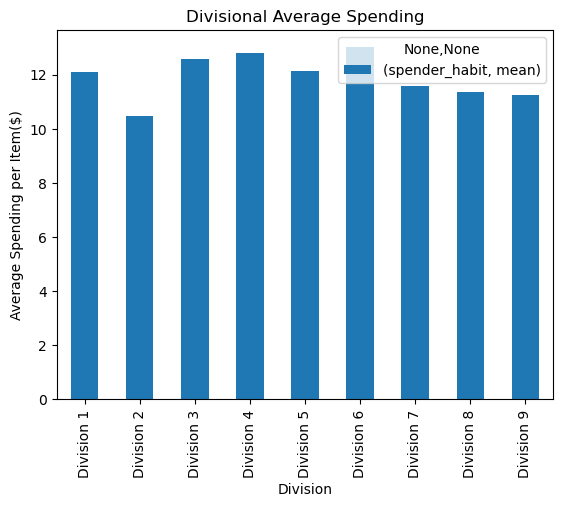

In [45]:
division_spending = division_spending.plot.bar(ylabel = 'Average Spending per Item ($)')
plt.title ('Divisional Average Spending')
plt.ylabel ('Average Spending per Item($)')
plt.xlabel ('Division')

In [46]:
#Saving the figure
division_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10 Visual', 'division_spending.png'))

## Exclusion Flag for low-activity customers (Customers with less than 5 orders)
#### Create a pkl file for this new dataframe without the low-activity customers

In [47]:
# Creating an 'exclusion_flag' column
instacartdata.loc[instacartdata['max_order'] >= 5, 'exclusion_flag'] = 'Not Excluded'
instacartdata.loc[instacartdata['max_order'] < 5, 'exclusion_flag'] = 'Excluded'

In [48]:
# Count the 'Not Excluded' and 'Excluded'
instacartdata['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [49]:
#Creating a new dataframe where Excluded users are removed (using subsetting)
instacartdata_nolowactivity = instacartdata[instacartdata['exclusion_flag'] == 'Not Excluded']

In [50]:
instacartdata_nolowactivity.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_timestamp,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_spent,spender_habit,spender_habit2,frequency_median,frequency_buyer,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,division,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4,Not Excluded
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,both,Mid-range product,Regularly busy,Regularly days,Average Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4,Not Excluded
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,0.0,4,0,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4,Not Excluded
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,both,High-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4,Not Excluded
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,both,Mid-range product,Regularly busy,Regularly days,Most Orders,32,Regular customer,1026.5,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Division 4,Not Excluded


In [51]:
instacartdata_nolowactivity.shape

(30964564, 38)

In [52]:
#Saving this dataframe no low activity users
instacartdata_nolowactivity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacartdata_nolowactivity.pkl'))

## Customer Profiling
#### This profiling will be based on age, income, number of dependents, and family demographics

In [53]:
#Creating income profiling: Low, Mid, High.
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['income'] < 48500, 'income_class'] = 'Low'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['income'] <= 119000) & (instacartdata_nolowactivity['income'] >= 48500), 'income_class'] = 'Mid'
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['income'] > 119000, 'income_class'] = 'High'

/var/folders/yx/l6p5d3ns1r51h2lympbmd9540000gn/T/ipykernel_4298/3817252140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacartdata_nolowactivity.loc[instacartdata_nolowactivity['income'] < 48500, 'income_class'] = 'Low'


In [54]:
#Check if the column has been created
instacartdata_nolowactivity['income_class'].value_counts(dropna = False)

income_class
Mid     18410927
High     9407513
Low      3146124
Name: count, dtype: int64

#### Income profiling guideline followed this research analysis: 
#### https://www.pewresearch.org/short-reads/2022/04/20/how-the-american-middle-class-has-changed-in-the-past-five-decades/

In [55]:
#Creating age profiling: Young Adult, Middle Age, Senior
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['age']<= 26,'age_category'] = 'Young Adult'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['age'] <= 64) & (instacartdata_nolowactivity['age'] > 26),'age_category'] = 'Middle Age'
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['age'] > 64,'age_category'] = 'Senior'

/var/folders/yx/l6p5d3ns1r51h2lympbmd9540000gn/T/ipykernel_4298/3469258381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacartdata_nolowactivity.loc[instacartdata_nolowactivity['age']<= 26,'age_category'] = 'Young Adult'


In [56]:
instacartdata_nolowactivity['age_category'].value_counts(dropna = False)

age_category
Middle Age     18414610
Senior          8195544
Young Adult     4354410
Name: count, dtype: int64

In [57]:
#Creating dependants profiling: None, With Depedants
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['n_dependants'] == 0,'dependants'] = 'None'
instacartdata_nolowactivity.loc[instacartdata_nolowactivity['n_dependants'] > 0,'dependants'] = 'With Dependants'

/var/folders/yx/l6p5d3ns1r51h2lympbmd9540000gn/T/ipykernel_4298/499854822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacartdata_nolowactivity.loc[instacartdata_nolowactivity['n_dependants'] == 0,'dependants'] = 'None'


In [58]:
instacartdata_nolowactivity['dependants'].value_counts(dropna = False)

dependants
With Dependants    23224883
None                7739681
Name: count, dtype: int64

In [59]:
# Creating Family Demographics for Young Adult(YA): Single YA(no dependants), Married YA(no dependants), Single Young Parent, Married Young Parent
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Young Adult') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] ='Single Young Adult'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Young Adult') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Young Adult'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Young Adult') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] = 'Single Young Parent'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Young Adult') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Young Parent'

/var/folders/yx/l6p5d3ns1r51h2lympbmd9540000gn/T/ipykernel_4298/1088423406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Young Adult') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] ='Single Young Adult'


In [60]:
instacartdata_nolowactivity['family_demographics'].value_counts(dropna = False)

family_demographics
nan                     26610154
Married Young Parent     1804109
Single Young Parent      1481172
Single Young Adult       1069129
Name: count, dtype: int64

In [61]:
# There's no Married Young Adult(no kids) that showed up, meaning that all that YA that are married got dependants

In [62]:
# Creating Family Demographics for Middle Age: Single Middle Age(no dependants), Married Middle Age(no dependants), Single Middle Age, Married Middle Age
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Middle Age') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] ='Single Middle Age'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Middle Age') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Middle Age'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Middle Age') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] = 'Single Middle Age Parent'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Middle Age') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Middle Age Parent'

In [63]:
instacartdata_nolowactivity['family_demographics'].value_counts(dropna = False)

family_demographics
Married Middle Age Parent    13766016
nan                           8195544
Single Middle Age             4648594
Married Young Parent          1804109
Single Young Parent           1481172
Single Young Adult            1069129
Name: count, dtype: int64

In [64]:
# Creating Family Demographics for Senior: Single Senior(no dependants), Married Senior(no dependants), Single Senior Parent, Married Senior Parent
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Senior') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] ='Single Senior'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'None') & (instacartdata_nolowactivity['age_category'] =='Senior') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Senior'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Senior') & (instacartdata_nolowactivity['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'family_demographics'] = 'Single Senior Parent'
instacartdata_nolowactivity.loc[(instacartdata_nolowactivity['dependants'] == 'With Dependants') & (instacartdata_nolowactivity['age_category'] =='Senior') & (instacartdata_nolowactivity['fam_status'] == 'married'),'family_demographics'] = 'Married Senior Parent'

In [65]:
instacartdata_nolowactivity['family_demographics'].value_counts(dropna = False)

family_demographics
Married Middle Age Parent    13766016
Married Senior Parent         6173586
Single Middle Age             4648594
Single Senior                 2021958
Married Young Parent          1804109
Single Young Parent           1481172
Single Young Adult            1069129
Name: count, dtype: int64

In [66]:
# Doing the last count and seeing that there's no more 'nan' means that all of the rows has been organized.

## Creating Visualization for the Customer Profiling

#### Pie Chart for Income Distribution

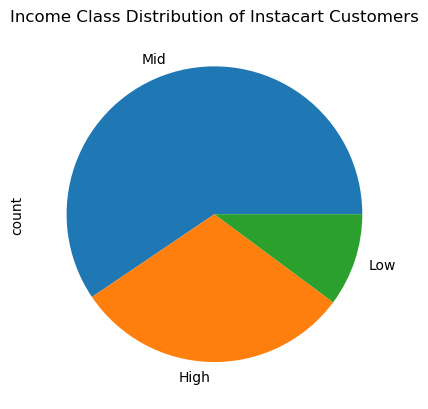

In [67]:
pie_income = instacartdata_nolowactivity['income_class'].value_counts().plot.pie()
plt.title('Income Class Distribution of Instacart Customers')
labels = ['Low (<$48500)', 'Mid (Between $48500 to $119,000)', 'High (>$119,000)']
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 Visual', 'IncomeDistribution.png'))

#### Pie Chart for Age Contribution

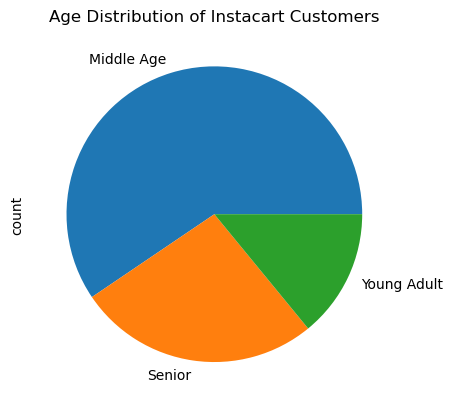

In [68]:
pie_age = instacartdata_nolowactivity['age_category'].value_counts().plot.pie()
plt.title('Age Distribution of Instacart Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 Visual', 'AgeDistribution.png'))

#### Bar Chart for Age Contribution

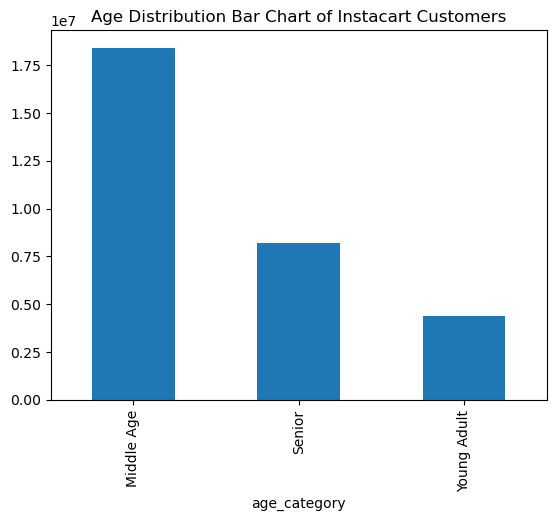

In [69]:
bar_age = instacartdata_nolowactivity['age_category'].value_counts().plot.bar()
plt.title('Age Distribution Bar Chart of Instacart Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 Visual', 'AgeBarDistribution.png'))

#### Pie Chart for Dependants

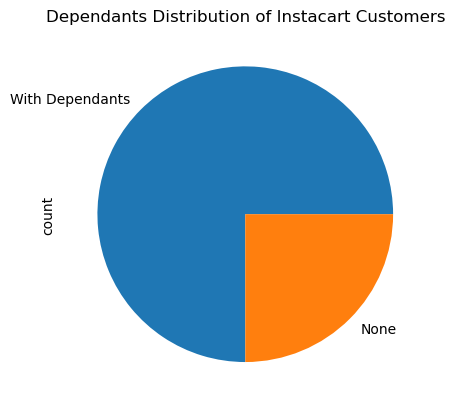

In [70]:
pie_dependants = instacartdata_nolowactivity['dependants'].value_counts().plot.pie()
plt.title('Dependants Distribution of Instacart Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 Visual', 'DependantsDistribution.png'))

#### Bar chart for the family demographics

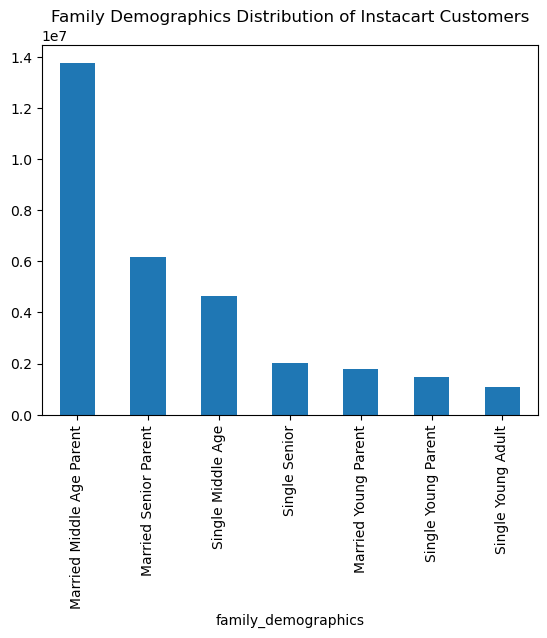

In [71]:
bar_familydemo = instacartdata_nolowactivity['family_demographics'].value_counts().plot.bar()
plt.title('Family Demographics Distribution of Instacart Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 Visual', 'FamilyDistribution.png'))

## Aggregate the max, mean, and min variables on customer-profile for usage frequency and expenditure

In [72]:
instacartdata_nolowactivity.groupby('family_demographics').agg({'frequency_median':['mean','max','min']})

frequency_median           
                                      mean   max  min
family_demographics                                  
Married Middle Age Parent         9.375925  30.0  0.0
Married Senior Parent             9.316112  30.0  0.0
Married Young Parent              9.279772  30.0  0.0
Single Middle Age                 9.290559  30.0  0.0
Single Senior                     9.277441  30.0  0.0
Single Young Adult                9.500689  30.0  0.0
Single Young Parent               9.256878  30.0  0.0

In [73]:
instacartdata_nolowactivity.groupby('family_demographics').agg({'spender_habit':['mean','max','min']})

spender_habit                        
                                   mean           max       min
family_demographics                                            
Married Middle Age Parent     11.972114   6983.593023  1.000000
Married Senior Parent         11.675617   7414.485185  1.262500
Married Young Parent          12.652573   4924.385246  2.000000
Single Middle Age             11.915626  15006.940000  1.000000
Single Senior                 12.008598  14042.512281  1.308333
Single Young Adult            13.093762   8794.882427  2.100000
Single Young Parent           10.890167  10209.987755  2.133333

#### The data above shows that across the family demographics, they call come back to order on Instacart in about every 9 days.
#### When it comes to expenditure, Single Young Adult will spend more on an item on average in comparison to Single Young Parent.

# Working on Recommendations Part of the Project

### Checking for the differences in ordering habits based on customer's loyalty status

In [74]:
instacartdata_nolowactivity.dtypes

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_timestamp              int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
exists                    category
price_range_loc             object
busiest_day                 object
busiests_days               object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spender_habit              float64
spender_habit2              object
frequency_median           float64
frequency_buyer             object
first_name                  object
surname                     object
gender              

In [75]:
instacartdata_nolowactivity.groupby(['loyalty_flag']).agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,5.916068
New customer,15.116671
Regular customer,11.546425


In [76]:
instacartdata_nolowactivity.groupby(['loyalty_flag']).agg({'prices':['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,7.773575
New customer,7.801665
Regular customer,7.798262


In [77]:
# checking is there's a connection between how often to show and the family demographics of the users
instacartdata_nolowactivity.groupby(['family_demographics']).agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
family_demographics,
Married Middle Age Parent,10.259826
Married Senior Parent,10.217605
Married Young Parent,10.160891
Single Middle Age,10.176421
Single Senior,10.191263
Single Young Adult,10.417323
Single Young Parent,10.181062


In [79]:
instacartdata_nolowactivity.groupby(['family_demographics']).agg({'total_spent':['mean']})

,total_spent
,mean
family_demographics,
Married Middle Age Parent,4935.680214
Married Senior Parent,4907.531512
Married Young Parent,5325.331364
Single Middle Age,4810.066350
Single Senior,4587.895554
Single Young Adult,4798.399084
Single Young Parent,4337.467403


In [ ]:
#Saving this dataframe no low activity users and profiling data
instacartdata_nolowactivity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacartdata_nolowp_profiled.pkl'))